In [1]:
import os
import sys
import numpy as np
import torch
import xarray as xr
from matplotlib import pyplot as plt

from scipy.linalg import pinv
import scipy
import pydmd

from tqdm import tqdm

from sklearn.decomposition import PCA

import time

import pickle as pkl
# import pykoopman

import sys
sys.path.append('../')
from utils import *

scenario 126 done
scenario 245 done
scenario 370 done
scenario 585 done


<Figure size 640x480 with 0 Axes>

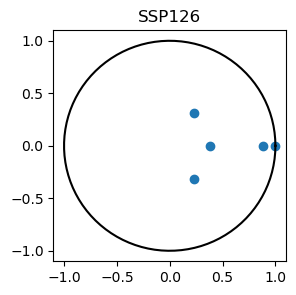

<Figure size 640x480 with 0 Axes>

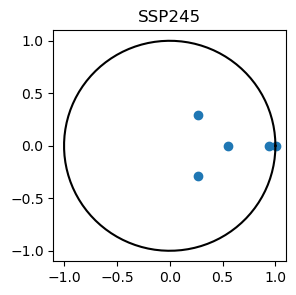

<Figure size 640x480 with 0 Axes>

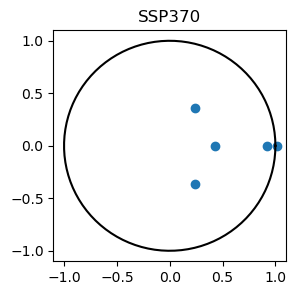

<Figure size 640x480 with 0 Axes>

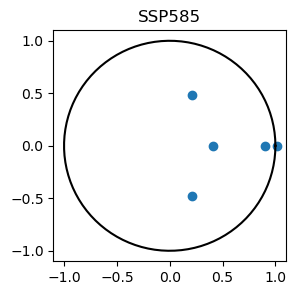

In [2]:
lag = 30
for scenario in [126, 245, 370, 585]:
    xr_train_emissions = load_emissions_dataset('../data/train_val/inputs_historical.nc')
    xr_test_emissions = load_emissions_dataset(f'../data/train_val/inputs_ssp{scenario}.nc')
    times, emissions_data = extract_forcing_agents(xr_train_emissions, xr_test_emissions)

    xr_train_clim = xr.open_dataset('../data/train_val/outputs_historical.nc').mean(dim='member')
    xr_test_clim = xr.open_dataset(f'../data/train_val/outputs_ssp{scenario}.nc').mean(dim='member')

    tas_all = xr.concat([xr_train_clim, xr_test_clim], dim = 'time').tas.values[lag-1:,:]
    ntime, nlat, nlong = tas_all.shape
    tas_data = tas_all.reshape(ntime, -1)
    
    my_dmd = pydmd.DMD(svd_rank=5)   #(svd_rank=5) 

    my_dmd.fit(tas_data.T)

    plt.figure()
    theta = np.linspace(0, 2*np.pi, 100)
    # Parametric equations for the unit circle
    x = np.cos(theta)
    y = np.sin(theta)
    # Plot the unit circle
    plt.figure(figsize=(3, 3))
    plt.plot(x, y, color = 'k')
    plt.scatter(np.real(my_dmd.eigs), np.imag(my_dmd.eigs))
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    plt.title(f'SSP{scenario}')

    with open(f"../models/DMD/tas{scenario}.pkl", "wb") as file:
        pkl.dump(my_dmd, file)

    print(f'scenario {scenario} done')

In [3]:
for scenario in [126, 245, 370, 585]:
    xr_train_emissions = load_emissions_dataset('../data/train_val/inputs_historical.nc')
    xr_test_emissions = load_emissions_dataset(f'../data/train_val/inputs_ssp{scenario}.nc')
    times, emissions_data = extract_forcing_agents(xr_train_emissions, xr_test_emissions)

    xr_train_clim = xr.open_dataset('../data/train_val/outputs_historical.nc').mean(dim='member')
    xr_test_clim = xr.open_dataset(f'../data/train_val/outputs_ssp{scenario}.nc').mean(dim='member')

    pr_all = xr.concat([xr_train_clim, xr_test_clim], dim = 'time').pr.values
    ntime, nlat, nlong = tas_all.shape
    pr_data_raw = pr_all.reshape(ntime, -1)
    pr_data_less_raw =  log_transform(pr_data_raw, np.min(pr_data_raw))
    pr_data = pr_data_less_raw - np.mean(pr_data_less_raw, axis = 0)

    my_dmdc = pydmd.DMD(svd_rank=5)   #(svd_rank=5) 
    my_dmdc.fit(pr_data.T)

    with open(f"../models/DMD/pr{scenario}.pkl", "wb") as file:
        pkl.dump(my_dmdc, file)

    print(f'scenario {scenario} done')

ValueError: cannot reshape array of size 3469824 into shape (222,newaxis)